<a href="https://colab.research.google.com/github/swap-253/COVID-19-Radiography-Results-Prediction-Using-CNNs/blob/main/TimeSeriesCausalImpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

Saving txt1.csv to txt1.csv


In [ ]:
df= pd.read_csv('txt1.csv')
df.head()

,COUNTRY,COMPANY,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,ID
0,Germany,CarryFive Enterprises,BR013,DISHWASHER PRODUCTS,S_4551211540772,TABLETS WITH SOLUBLE FILM,2020-02-29,0,0.0,0.0,0.0,0.0,2018-10-13_S_4551211540772
1,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_1941017257445,AUTOMATIC SPRAY,2020-07-18,149,1461.7,149.0,1462.0,32.0,2019-03-02_S_1941017257445
2,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_6465079411571,AUTOMATIC SPRAY,2020-06-06,50,198.9,50.0,198.9,9.0,2019-01-19_S_6465079411571
3,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4071113797455,STANDARD SPRAY,2019-08-17,0,0.0,0.0,0.0,0.0,2018-03-31_S_4071113797455
4,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4717130715785,PORTABLE ELECTRICAL,2019-12-21,0,0.0,0.0,0.0,0.0,2018-08-04_S_4717130715785


In [ ]:
df['PRICE_UNIT']=df['AMT_VALUE']/df['UNITS']
df['PRICE_UNIT'].fillna(0,inplace=True)
df.head()

,COUNTRY,COMPANY,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,ID,PRICE_UNIT
0,Germany,CarryFive Enterprises,BR013,DISHWASHER PRODUCTS,S_4551211540772,TABLETS WITH SOLUBLE FILM,2020-02-29,0,0.0,0.0,0.0,0.0,2018-10-13_S_4551211540772,0.000000
1,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_1941017257445,AUTOMATIC SPRAY,2020-07-18,149,1461.7,149.0,1462.0,32.0,2019-03-02_S_1941017257445,9.810067
2,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_6465079411571,AUTOMATIC SPRAY,2020-06-06,50,198.9,50.0,198.9,9.0,2019-01-19_S_6465079411571,3.978000
3,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4071113797455,STANDARD SPRAY,2019-08-17,0,0.0,0.0,0.0,0.0,2018-03-31_S_4071113797455,0.000000
4,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4717130715785,PORTABLE ELECTRICAL,2019-12-21,0,0.0,0.0,0.0,0.0,2018-08-04_S_4717130715785,0.000000


In [ ]:
df['WEEK_END_DATE']=pd.to_datetime(df['WEEK_END_DATE'])

In [ ]:
df_c5=df[df['COMPANY']=='CarryFive Enterprises']
df_c6=df_c5[['WEEK_END_DATE','UNITS','AMT_VALUE']].groupby(['WEEK_END_DATE']).sum().reset_index()
df_c6['PRICE_UNIT']=df_c6['AMT_VALUE']/df_c6['UNITS']
df_c6.head()

,WEEK_END_DATE,UNITS,AMT_VALUE,PRICE_UNIT
0,2019-08-17,2186224,6457041.2,2.953513
1,2019-08-24,2137584,6067067.3,2.838283
2,2019-08-31,2168242,6308843.0,2.909658
3,2019-09-07,2112760,6226021.6,2.946866
4,2019-09-14,2147493,6451627.5,3.004260


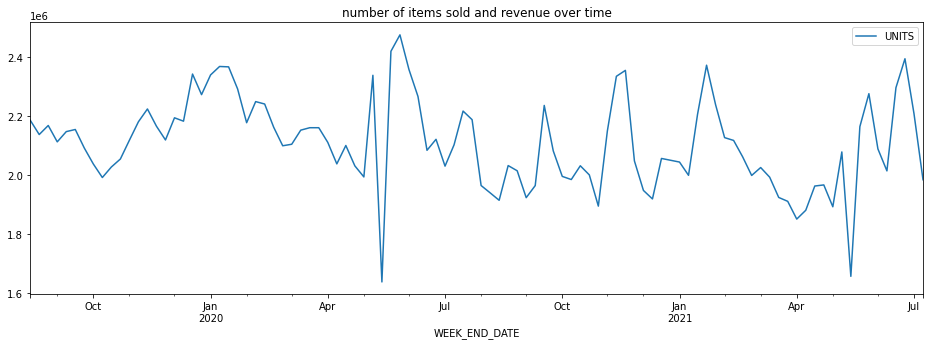

In [ ]:
df_c6.groupby('WEEK_END_DATE').agg(
    {'UNITS': 'sum'}
).plot(
    title='number of items sold and revenue over time', 
    figsize=(16, 5))

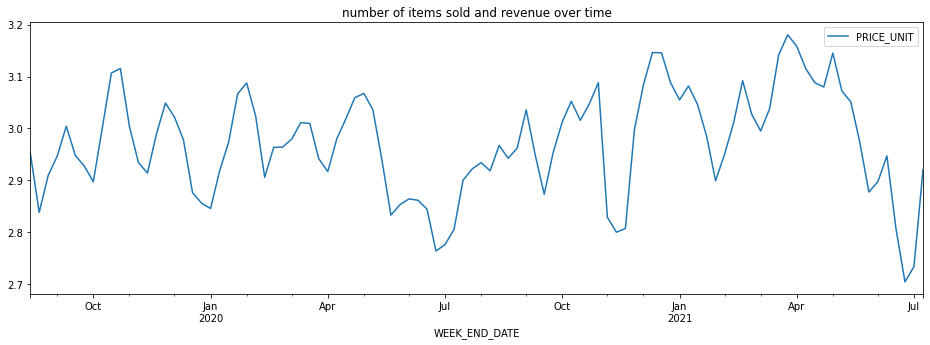

In [ ]:
df_c6.groupby('WEEK_END_DATE').agg(
    {'PRICE_UNIT': 'sum'}
).plot(
    title='number of items sold and revenue over time', 
    figsize=(16, 5))

In [ ]:
!pip install -q pycausalimpact
from causalimpact import CausalImpact

     |████████████████████████████████| 9.8 MB 8.0 MB/s 


In [ ]:
df_c6['WEEK_END_DATE'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     100
unique                    100
top       2019-08-17 00:00:00
freq                        1
first     2019-08-17 00:00:00
last      2021-07-10 00:00:00
Name: WEEK_END_DATE, dtype: object

In [ ]:
df_c6['yyyy'] = pd.to_datetime(df_c6['WEEK_END_DATE']).dt.year
df_c6['mm'] = pd.to_datetime(df_c6['WEEK_END_DATE']).dt.month
df_c6.head()

,WEEK_END_DATE,UNITS,AMT_VALUE,PRICE_UNIT,yyyy,mm
0,2019-08-17,2186224,6457041.2,2.953513,2019,8
1,2019-08-24,2137584,6067067.3,2.838283,2019,8
2,2019-08-31,2168242,6308843.0,2.909658,2019,8
3,2019-09-07,2112760,6226021.6,2.946866,2019,9
4,2019-09-14,2147493,6451627.5,3.004260,2019,9


In [ ]:
df_c6[df_c6['mm']==9]

,WEEK_END_DATE,UNITS,AMT_VALUE,PRICE_UNIT,yyyy,mm
3,2019-09-07,2112760,6226021.6,2.946866,2019,9
4,2019-09-14,2147493,6451627.5,3.004260,2019,9
5,2019-09-21,2154687,6352382.2,2.948169,2019,9
6,2019-09-28,2091753,6123282.3,2.927345,2019,9
55,2020-09-05,1923393,5839115.5,3.035841,2020,9
56,2020-09-12,1964326,5792693.7,2.948947,2020,9
57,2020-09-19,2236323,6425077.6,2.873054,2020,9
58,2020-09-26,2082114,6151261.0,2.954334,2020,9


In [ ]:
df_c7 = df_c6.set_index('WEEK_END_DATE')
df_c7.head()

,UNITS,AMT_VALUE,PRICE_UNIT,yyyy,mm
WEEK_END_DATE,,,,,
2019-08-17,2186224,6457041.2,2.953513,2020,2
2019-08-24,2137584,6067067.3,2.838283,2020,7
2019-08-31,2168242,6308843.0,2.909658,2020,6
2019-09-07,2112760,6226021.6,2.946866,2019,8
2019-09-14,2147493,6451627.5,3.004260,2019,12


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: prior_level_sd, nseasons, standardize. After release 0.14, this will raise.
  FutureWarning


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    3.0                131.97
Prediction (s.d.)         2.93 (0.03)        128.99 (1.23)
95% CI                    [2.88, 2.99]       [126.68, 131.52]

Absolute effect (s.d.)    0.07 (0.03)        2.97 (1.23)
95% CI                    [0.01, 0.12]       [0.44, 5.29]

Relative effect (s.d.)    2.31% (0.96%)      2.31% (0.96%)
95% CI                    [0.34%, 4.1%]      [0.34%, 4.1%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.9%

For more details run the command: print(impact.summary('report'))


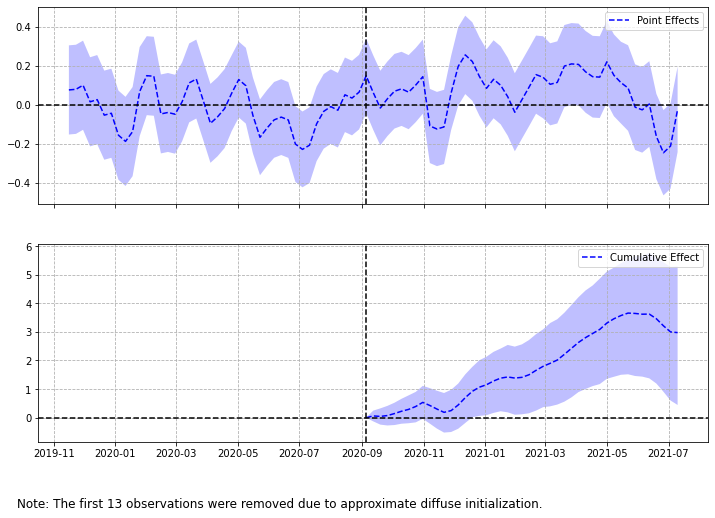

In [ ]:
# define the 'before' and 'after' periods
pre_period  = [pd.Timestamp('2019-08-17'),pd.Timestamp('2020-09-5')]
post_period = [ pd.Timestamp('2020-09-12') , pd.Timestamp('2021-07-10') ]

ci = CausalImpact(df_c7.loc[:,"PRICE_UNIT"], 
                  pre_period, post_period, 
                  nseasons=[{'period': 12}],
                  prior_level_sd=0.05)
# print out a summary
print(ci.summary())
# display the plots
ci.plot(panels=['pointwise','cumulative'], figsize=(12, 8));